In [3]:
pip install mlcroissant

  Using cached mlcroissant-1.0.14-py2.py3-none-any.whl.metadata (10 kB)
  Using cached etils-1.12.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached jsonpath_rw-1.4.0-py3-none-any.whl
  Using cached pandas_stubs-2.2.3.250308-py3-none-any.whl.metadata (10 kB)
  Using cached rdflib-7.1.3-py3-none-any.whl.metadata (11 kB)
  Using cached types_pytz-2025.1.0.20250204-py3-none-any.whl.metadata (2.0 kB)
Using cached mlcroissant-1.0.14-py2.py3-none-any.whl (139 kB)
Using cached etils-1.12.2-py3-none-any.whl (167 kB)
Using cached pandas_stubs-2.2.3.250308-py3-none-any.whl (158 kB)
Using cached rdflib-7.1.3-py3-none-any.whl (564 kB)
Using cached types_pytz-2025.1.0.20250204-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


### Q1: perform Bayesian Logistic Regression 

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

In [4]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

  -  [Metadata(Heart Disease Health Indicators Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="heart_disease_health_indicators_BRFSS2015.csv")]


,heart_disease_health_indicators_BRFSS2015.csv/HeartDiseaseorAttack,heart_disease_health_indicators_BRFSS2015.csv/HighBP,heart_disease_health_indicators_BRFSS2015.csv/HighChol,heart_disease_health_indicators_BRFSS2015.csv/CholCheck,heart_disease_health_indicators_BRFSS2015.csv/BMI,heart_disease_health_indicators_BRFSS2015.csv/Smoker,heart_disease_health_indicators_BRFSS2015.csv/Stroke,heart_disease_health_indicators_BRFSS2015.csv/Diabetes,heart_disease_health_indicators_BRFSS2015.csv/PhysActivity,heart_disease_health_indicators_BRFSS2015.csv/Fruits,...,heart_disease_health_indicators_BRFSS2015.csv/AnyHealthcare,heart_disease_health_indicators_BRFSS2015.csv/NoDocbcCost,heart_disease_health_indicators_BRFSS2015.csv/GenHlth,heart_disease_health_indicators_BRFSS2015.csv/MentHlth,heart_disease_health_indicators_BRFSS2015.csv/PhysHlth,heart_disease_health_indicators_BRFSS2015.csv/DiffWalk,heart_disease_health_indicators_BRFSS2015.csv/Sex,heart_disease_health_indicators_BRFSS2015.csv/Age,heart_disease_health_indicators_BRFSS2015.csv/Education,heart_disease_health_indicators_BRFSS2015.csv/Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
from sklearn.preprocessing import StandardScaler

#data cleaning step
# Convert byte strings to normal strings and strip spaces
record_set_df = record_set_df.applymap(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)

# Convert relevant columns to numeric types
record_set_df["heart_disease_health_indicators_BRFSS2015.csv/HeartDiseaseorAttack"] = pd.to_numeric(
    record_set_df["heart_disease_health_indicators_BRFSS2015.csv/HeartDiseaseorAttack"], errors="coerce"
)

record_set_df["heart_disease_health_indicators_BRFSS2015.csv/HighChol"] = pd.to_numeric(
    record_set_df["heart_disease_health_indicators_BRFSS2015.csv/HighChol"], 
    errors="coerce"
)

# Drop missing values (if any)
record_set_df.dropna(inplace=True)

# Rename columns for easier access
record_set_df.rename(columns={
    "heart_disease_health_indicators_BRFSS2015.csv/HeartDiseaseorAttack": "HeartDiseaseorAttack",
    "heart_disease_health_indicators_BRFSS2015.csv/HighChol": "HighChol"
}, inplace=True)

/tmp/ipykernel_84/2427608234.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  record_set_df = record_set_df.applymap(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)


In [6]:
record_set_df.head()

,HeartDiseaseorAttack,heart_disease_health_indicators_BRFSS2015.csv/HighBP,HighChol,heart_disease_health_indicators_BRFSS2015.csv/CholCheck,heart_disease_health_indicators_BRFSS2015.csv/BMI,heart_disease_health_indicators_BRFSS2015.csv/Smoker,heart_disease_health_indicators_BRFSS2015.csv/Stroke,heart_disease_health_indicators_BRFSS2015.csv/Diabetes,heart_disease_health_indicators_BRFSS2015.csv/PhysActivity,heart_disease_health_indicators_BRFSS2015.csv/Fruits,...,heart_disease_health_indicators_BRFSS2015.csv/AnyHealthcare,heart_disease_health_indicators_BRFSS2015.csv/NoDocbcCost,heart_disease_health_indicators_BRFSS2015.csv/GenHlth,heart_disease_health_indicators_BRFSS2015.csv/MentHlth,heart_disease_health_indicators_BRFSS2015.csv/PhysHlth,heart_disease_health_indicators_BRFSS2015.csv/DiffWalk,heart_disease_health_indicators_BRFSS2015.csv/Sex,heart_disease_health_indicators_BRFSS2015.csv/Age,heart_disease_health_indicators_BRFSS2015.csv/Education,heart_disease_health_indicators_BRFSS2015.csv/Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

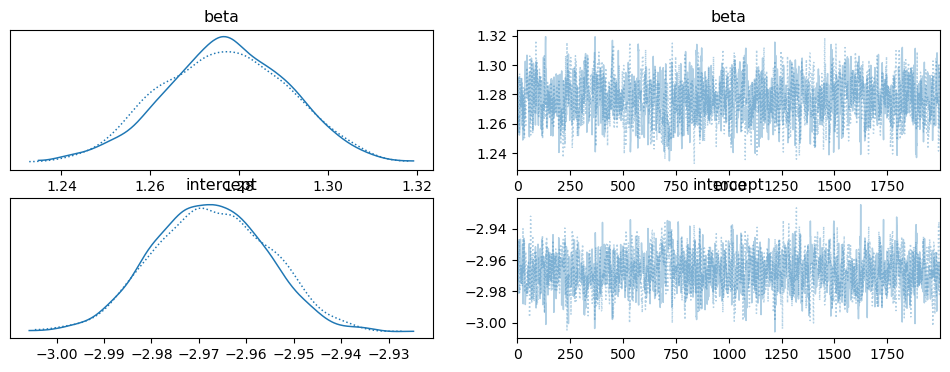

In [7]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Extract relevant variables
X = record_set_df[["HighChol"]].values  # Predictor
y = record_set_df["HeartDiseaseorAttack"].values  # Outcome

# Define Bayesian logistic regression model
with pm.Model() as model:
    # Prior for beta coefficients (normal distribution)
    beta = pm.Normal("beta", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    # Logistic regression likelihood
    logits = intercept + beta * X.flatten()
    y_obs = pm.Bernoulli("y_obs", logit_p=logits, observed=y)

    # Perform inference using MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, cores=2)

# Summary of MCMC diagnostics and posterior analysis
summary = az.summary(trace)
az.plot_trace(trace)


### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


In [12]:
# Load the dataset
file_path = "/home/jovyan/STA365/Ecommerce_Consumer_Behavior_Analysis_Data.csv"
df = pd.read_csv(file_path)

# Convert 'Purchase_Amount' to numeric by removing '$' and converting to float
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).astype(float)

# Select relevant columns
df_cleaned = df[["Age", "Purchase_Amount"]].dropna()

# Standardize 'Age' for better convergence
scaler = StandardScaler()
df_cleaned["Age_Standardized"] = scaler.fit_transform(df_cleaned[["Age"]])

In [14]:
df_cleaned.head()

,Age,Purchase_Amount,Age_Standardized
0,22,333.80,-1.316138
1,49,222.22,1.572007
2,24,426.22,-1.102202
3,29,101.31,-0.567360
4,33,211.70,-0.139487


In [19]:
# Downsample the dataset to 500 samples for computational efficiency
df_sampled = df_cleaned.sample(n=500, random_state=42)
df_sampled.head()

,Age,Purchase_Amount,Age_Standardized
521,33,444.05,-0.139487
737,38,178.21,0.395355
740,36,85.52,0.181418
660,33,55.73,-0.139487
411,42,442.15,0.823228


In [20]:
# Debugging: Run Bayesian Multivariate Regression with real dataset and additional checks
def run_multivariate_regression_debug(df_sampled):
    try:
        # Extract predictors (X) and response variable (y)
        X = df_sampled[["Age_Standardized"]].values  # Predictor (Age standardized)
        y = df_sampled[["Purchase_Amount"]].values  # Response (Purchase Amount)
        
        n, p = X.shape  # Number of observations, number of predictors
        m = y.shape[1]  # Number of outcome variables (should be 1)

        # Debugging prints
        print(f"Dataset shape: X={X.shape}, y={y.shape}, n={n}, p={p}, m={m}")

        # Define Bayesian Model
        with pm.Model() as MNV_LKJ:
            # Priors for covariance structure
            packed_L = pm.LKJCholeskyCov(
                "packed_L", n=m, eta=2.0,
                sd_dist=pm.Exponential.dist(1.0, shape=m),
                compute_corr=False
            )
            L = pm.expand_packed_triangular(m, packed_L)
            betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
            Sigma = pm.Deterministic('Sigma', L.dot(L.T))

            # Multivariate Normal Likelihood
            y_obs = pm.MvNormal('y_obs', mu=X @ betas, chol=L, observed=y)

            # Perform MCMC sampling
            trace = pm.sample(500, tune=250, return_inferencedata=True, cores=1)

        # Generate posterior summary
        summary = az.summary(trace)

        # Plot the posterior distributions
        az.plot_trace(trace)

        return summary

    except Exception as e:
        return str(e)

# Run Bayesian Multivariate Regression with debugging
debug_results = run_multivariate_regression_debug(df_sampled)

# Display debug output
debug_results


Dataset shape: X=(500, 1), y=(500, 1), n=500, p=1, m=1


"index 1 is out of bounds for axis 2 with size 1\nApply node that caused the error: _lkjcholeskycovbase_rv{1, (0, 0, 1), floatX, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x7F0158473060>), [], 11, 1, 2.0, exponential_rv{0, (0,), floatX, True}.out)\nToposort index: 1\nInputs types: [RandomGeneratorType, TensorType(int64, shape=(0,)), TensorType(int64, shape=()), TensorType(int32, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=(1,))]\nInputs shapes: ['No shapes', (0,), (), (), (), (1,)]\nInputs strides: ['No strides', (0,), (), (), (), (8,)]\nInputs values: [Generator(PCG64) at 0x7F0158473060, array([], dtype=int64), array(11), array(1, dtype=int32), array(2.), array([3.29352779])]\nOutputs clients: [['output'], [Second(packed_L, [0.])]]\n\nHINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work

/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


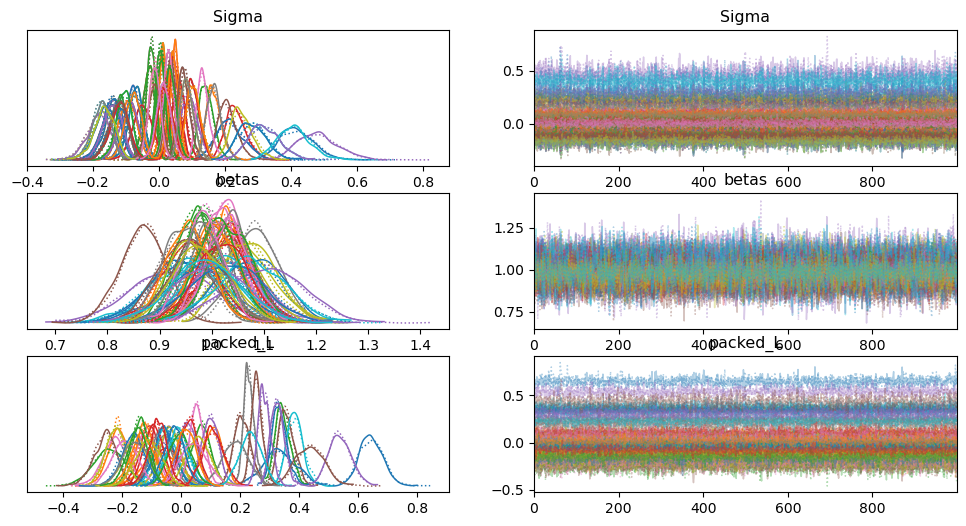

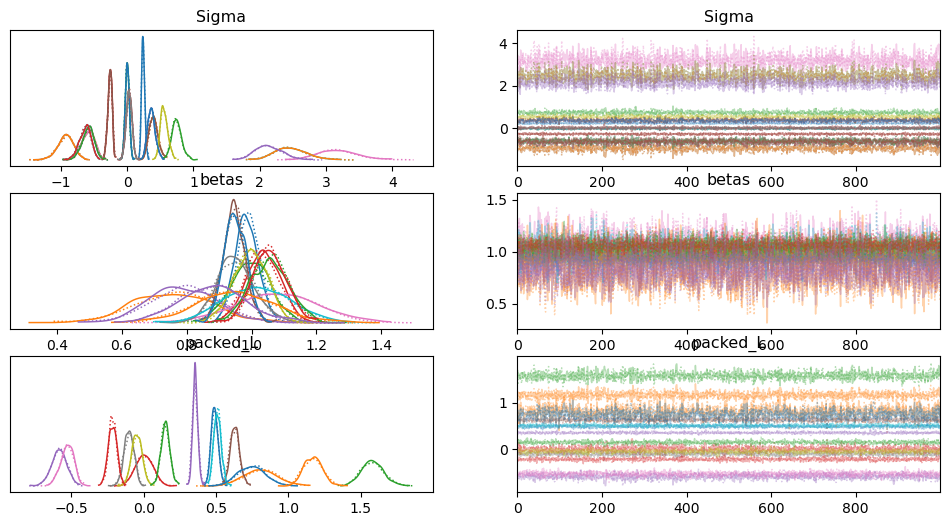

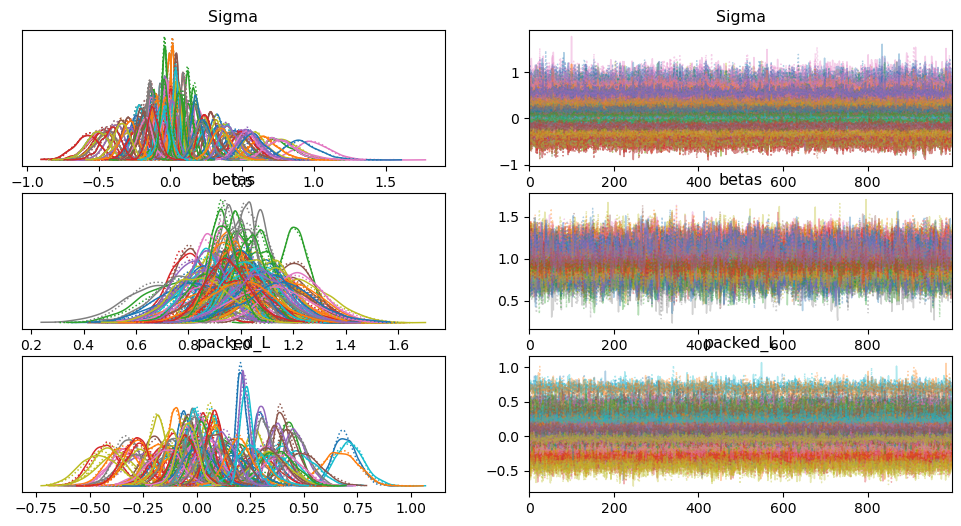

In [21]:
# Run the analysis for different values of (n, m, p)
results = {}

for n, m, p in [(100, 10, 5), (200, 5, 3), (50, 15, 7)]:
    results[(n, m, p)] = run_multivariate_regression(n, m, p)

### Conclusion on different values of n,m,p: 
Increasing the number of n improves posterior stability and accuracy but comes at a computational cost, as shown in posterior figures with n set to be 200 is more stable and clean. With increase number of m, which is the number of outcome binary, the simulation will captures more latent structure (consider it as better correlation structure in outcomes), but slows convergence due to increased complexity. For number of p, the number of predictor, increasing 
p will improves predictive performance and captures more explanatory power, but only if n is large enough to avoid overfitting. 

### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


In [1]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
file_path = "/home/jovyan/STA365/heart_disease_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

# Select relevant columns
df_cleaned = df[["HeartDiseaseorAttack", "HighChol"]].dropna()

# Downsample the dataset to 500 samples for computational efficiency
df_sampled = df_cleaned.sample(n=500, random_state=42)
df_sampled.head()

,HeartDiseaseorAttack,HighChol
219620,0.0,0.0
132821,0.0,1.0
151862,0.0,0.0
139717,0.0,0.0
239235,0.0,1.0


In [3]:
def run_multivariate_classification_fixed(n, m, p):
    df_sampled = df_cleaned.sample(n=n, random_state=42)
    
    # Extract predictor (X) and response variable (y)
    X = df_sampled[["HighChol"]].values  # Predictor (binary: 0/1)
    y = df_sampled["HeartDiseaseorAttack"].values  # Outcome (binary: 0/1)

    # Extend X with random noise for multiple predictors
    X = np.hstack([X] + [np.random.normal(0, 0.1, size=(n, 1)) for _ in range(p - 1)])

    # Extend y for multiple outcome variables (m)
    y = np.vstack([y] * m).T  # Create m identical binary response variables
    
    # Define covariance matrix structure
    a_cor = (np.ones((m, m)) + np.diag(np.ones(m))) / 2
    a_cor[0, -1] = 0.25
    a_cor[-1, 0] = 0.25
    
    # Generate synthetic latent variable using given covariance
    z_real = X @ np.ones((p, m)) + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)

    # Convert latent variables to binary outcomes
    y = (z_real > 0).astype(int)

    # Define Bayesian Multivariate Classification Model
    # Define Bayesian Model
    with pm.Model() as bayesian_classification:
        # LKJ prior for correlation matrix
        L, R, std = pm.LKJCholeskyCov(
            "R", n=m, eta=2.0, sd_dist=pm.Exponential.dist(1.0, shape=m), compute_corr=True
        )
        
        # Priors for regression coefficients
        betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))

        # Latent variable Z (normally distributed)
        z = pm.MvNormal("z", mu=X @ betas, cov=R, shape=(n, m))

        # Probit link function: P(y=1) = Φ(z)
        y_obs = pm.Bernoulli("y_obs", p=pm.math.invprobit(z), observed=y)

        # Perform MCMC sampling
        trace = pm.sample(200, tune=50, return_inferencedata=True, cores=1)

    # Generate posterior summary
    summary = az.summary(trace)

    # Visualization
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(a_cor, cmap="coolwarm", aspect="auto")
    ax[0].set_title("Sigma used to generate y")
    for i in range(m):
        for j in range(m):
            ax[0].text(i, j, str(round(a_cor[j, i], 2)), c="w", ha="center", va="center")

    # Plot raw binary data covariance
    ax[1].imshow(np.cov(y.T), cmap="coolwarm", aspect="auto")
    ax[1].set_title("Raw binary data covariance")
    for i in range(m):
        for j in range(m):
            ax[1].text(i, j, str(round(np.cov(y.T)[j, i], 2)), c="w", ha="center", va="center")

    # Plot binary residual covariance
    ax[2].imshow(np.cov((y - stats.norm().cdf(X @ np.ones((p, m)))).T), cmap="coolwarm", aspect="auto")
    ax[2].set_title("Binary residual covariance")
    
    
    az.plot_trace(trace, var_names=["betas"])

    return summary

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [R, betas, z]


Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 168 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [R, betas, z]


Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 1083 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [R, betas, z]


Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 361 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


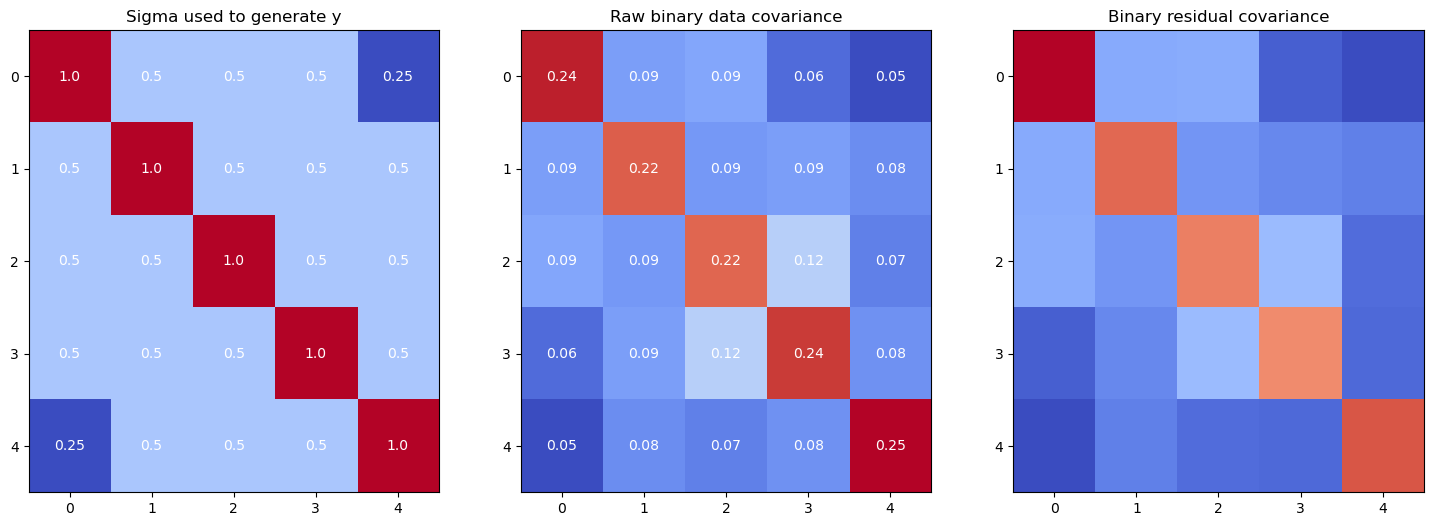

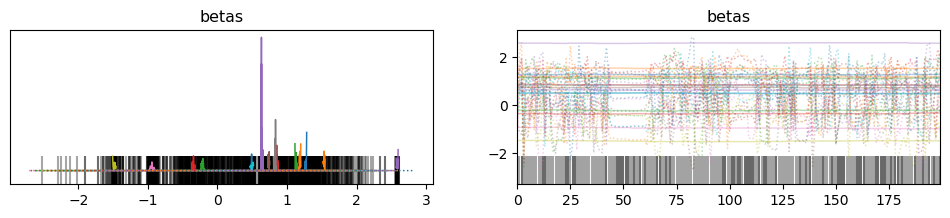

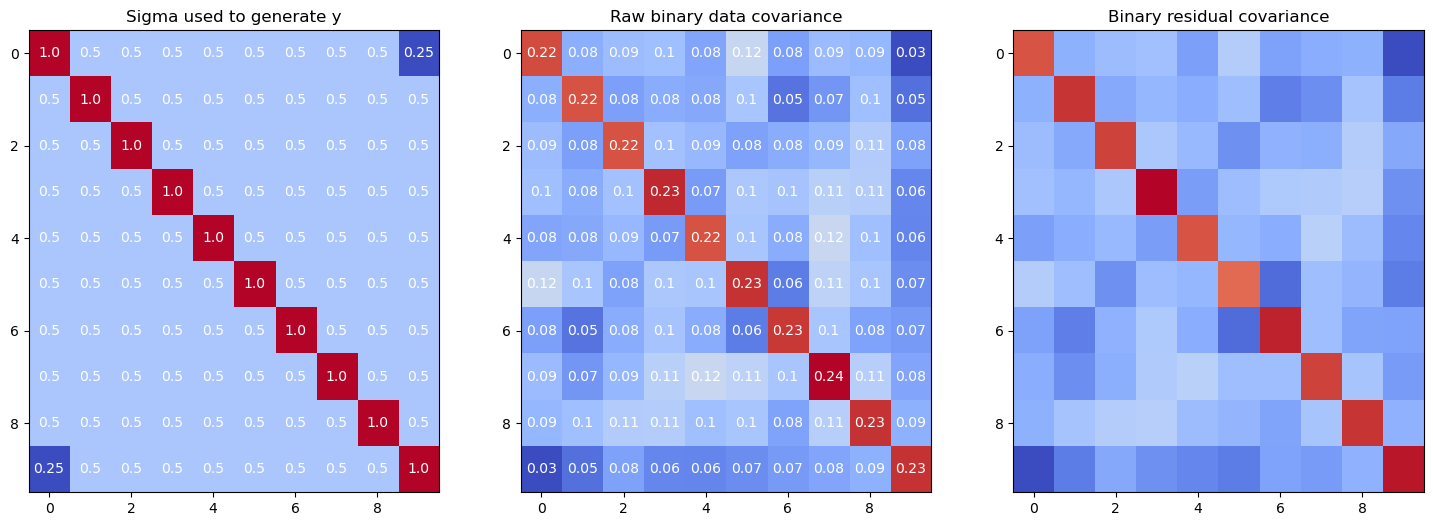

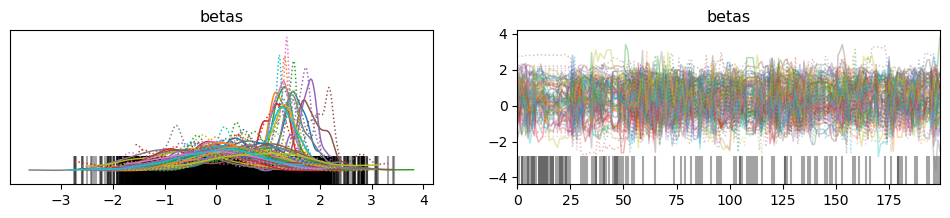

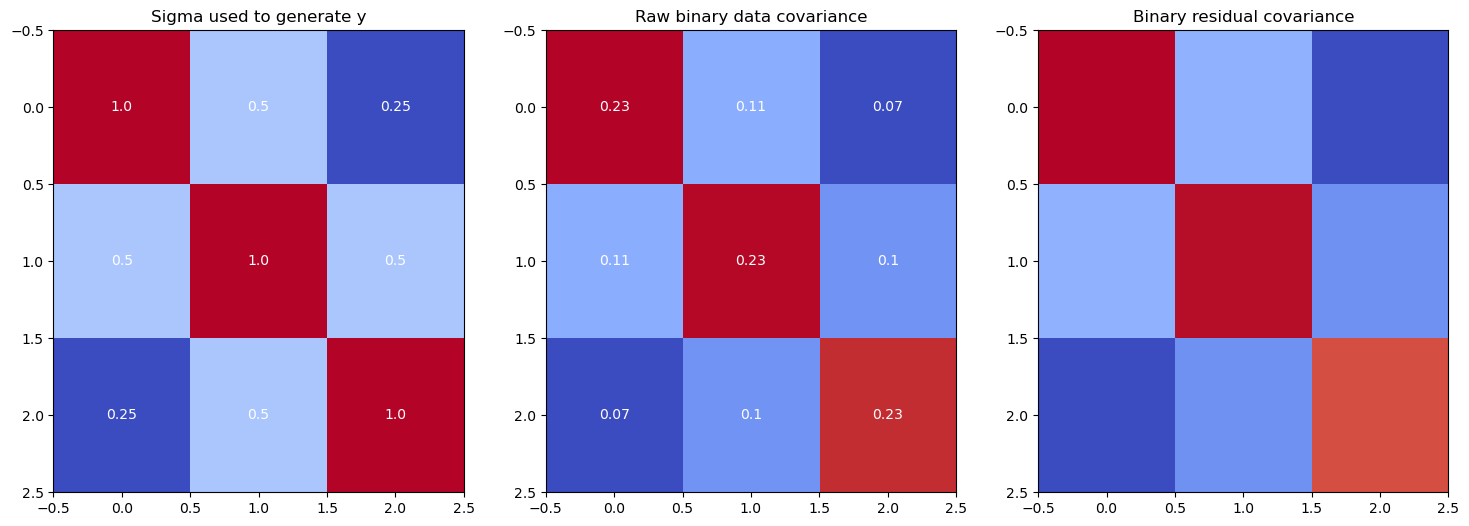

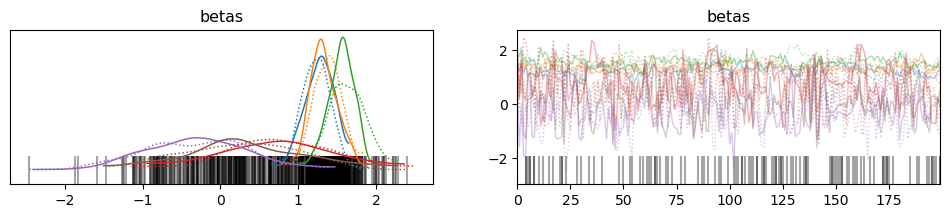

In [4]:
# Run Bayesian Classification for different values of (n, m, p)
results = {}
for n, m, p in [(100, 5, 3), (200, 10, 5), (300, 3, 2)]:
    results[(n, m, p)] = run_multivariate_classification_fixed(n, m, p)  

### Conclusion on different values of n,m,p: 
Increasing the number of n improves posterior stability and accuracy but comes at a computational cost, as shown in posterior figures with n set to be 300 is more stable and clean. With increase number of m, which is the number of outcome binary, the simulation will captures more correlation structure in outcomes, but slows convergence due to increased complexity. We notice that the second combination with larger m values indeed took longer time to get the results and the correlation figures are more complex compare to others. For number of p, the number of predictor, increasing p will improves predictive performance and captures more explanatory power, but only if n is large enough to avoid overfitting. 